# **ANSWER NO 1**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [73]:
df=pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

In [74]:
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [75]:
df.info

<bound method DataFrame.info of    Date received                                            Product  \
0      3/12/2014                                           Mortgage   
1      1/19/2017                                       Student loan   
2       4/6/2018                        Credit card or prepaid card   
3       6/8/2014                                        Credit card   
4      9/13/2014                                    Debt collection   
..           ...                                                ...   
94     2/10/2015                                    Money transfers   
95     1/20/2015                                           Mortgage   
96     8/15/2018  Money transfer, virtual currency, or money ser...   
97     1/29/2017                                   Credit reporting   
98    11/18/2014                                    Debt collection   

                                   Sub-product  \
0                               Other mortgage   
1              

In [76]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [77]:
df['Consumer complaint narrative'].fillna('No complaint filed', inplace=True)

In [78]:
row_with_missing_state = df[df['State'].isnull()]
print(row_with_missing_state)

   Date received   Product                 Sub-product  \
52     8/27/2018  Mortgage  Conventional home mortgage   

   Consumer complaint narrative  \
52           No complaint filed   

                              Company public response  \
52  Company has responded to the consumer and the ...   

                                 Company State ZIP code Submitted via  \
52  SANTANDER BANK, NATIONAL ASSOCIATION   NaN      NaN         Phone   

   Company response to consumer Timely response? Consumer disputed?  
52      Closed with explanation              Yes                NaN  


In [79]:
df[df['Company']=='SANTANDER BANK, NATIONAL ASSOCIATION']

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
52,8/27/2018,Mortgage,Conventional home mortgage,No complaint filed,Company has responded to the consumer and the ...,"SANTANDER BANK, NATIONAL ASSOCIATION",NaN,NaN,Phone,Closed with explanation,Yes,NaN


In [ ]:
#We have to drop it

In [80]:
df = df.dropna(subset=['State'])

In [81]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative     0
Company public response         66
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              23
dtype: int64

In [82]:
df['Consumer disputed?'].value_counts()

No     56
Yes    19
Name: Consumer disputed?, dtype: int64

In [83]:
df['Consumer disputed?'].fillna('Not specified', inplace=True)


df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: 'Yes' if x.lower() == 'yes' else ('No' if x.lower() == 'no' else 'Not specified'))

<ipython-input-83-d52db721621e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumer disputed?'].fillna('Not specified', inplace=True)
<ipython-input-83-d52db721621e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: 'Yes' if x.lower() == 'yes' else ('No' if x.lower() == 'no' else 'Not specified'))


In [84]:
df['Consumer disputed?'].value_counts()

No               56
Not specified    23
Yes              19
Name: Consumer disputed?, dtype: int64

In [85]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative     0
Company public response         66
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?               0
dtype: int64

In [86]:
no_complaint_and_nan_response_rows = df[
    (df['Consumer complaint narrative'] == 'No complaint filed') &
    df['Company public response'].isnull()
]

In [87]:
no_complaint_and_nan_response_rows.value_counts()

Series([], dtype: int64)

In [88]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative     0
Company public response         66
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?               0
dtype: int64

In [89]:
# Impute "No response needed" for the "Company public response" column
df.loc[no_complaint_and_nan_response_rows.index, 'Company public response'] = 'No response needed'


<ipython-input-89-a71d5ddfb349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[no_complaint_and_nan_response_rows.index, 'Company public response'] = 'No response needed'


In [90]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative     0
Company public response          5
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?               0
dtype: int64

In [91]:
# Find indices where "Company public response" has NaN values
nan_response_indices = df[df['Company public response'].isnull()].index

In [92]:
nan_response_indices

Int64Index([1, 2, 13, 46, 89], dtype='int64')

In [93]:
# List of indices where company has not responded
not_responded_indices = [1, 2, 13, 46, 89]  # Replace with the actual indices

# Replace NaN values with "Not responded" in the "Company public response" column for the specified indices
df.loc[not_responded_indices, 'Company public response'] = 'Not responded'

<ipython-input-93-ef8f08ead013>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[not_responded_indices, 'Company public response'] = 'Not responded'


In [94]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative     0
Company public response          0
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?               0
dtype: int64

In [95]:
placeholder_category = 'not Specified'
df['Sub-product'].fillna(placeholder_category, inplace=True)

<ipython-input-95-272a9e046114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sub-product'].fillna(placeholder_category, inplace=True)


In [96]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        9
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [97]:
placeholder_zip_code = -1 # Not Given It means

df['ZIP code'].fillna(placeholder_zip_code, inplace=True)

<ipython-input-97-7b4830b9567b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZIP code'].fillna(placeholder_zip_code, inplace=True)


In [98]:
df.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

### **IN ABOVE I HAVE USED DIFFERENT TECHNIQUES FOR EACH COLUMN WHICH HAVE NAN VALUE **




# **ANSWER NO 2**

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [ ]:
summary_stats = df.describe()
print(summary_stats)

       Date received   Product     Sub-product Consumer complaint narrative  \
count             98        98              98                           98   
unique            90        11              26                           17   
top        8/28/2018  Mortgage  Other mortgage           No complaint filed   
freq               3        35              13                           82   

       Company public response                              Company State  \
count                       98                                   98    98   
unique                       7                                   54    34   
top         No response needed  Experian Information Solutions Inc.    CA   
freq                        61                                   11    15   

        ZIP code Submitted via Company response to consumer Timely response?  \
count         98            98                           98               98   
unique        89             5                            

In [ ]:
df['Submitted via'].value_counts()

Web            72
Referral       17
Phone           3
Fax             3
Postal mail     3
Name: Submitted via, dtype: int64

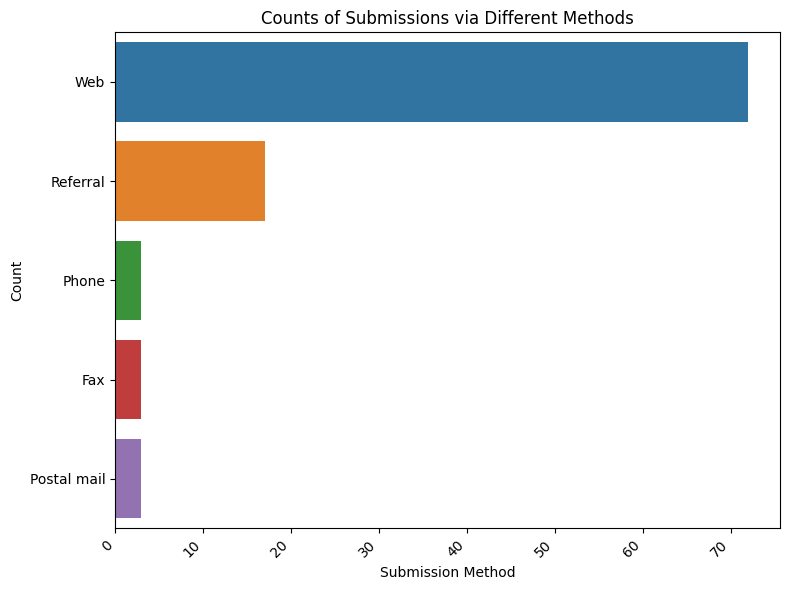

In [ ]:
submission_counts = df['Submitted via'].value_counts()

# Plot a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(y=submission_counts.index, x=submission_counts.values)
plt.title('Counts of Submissions via Different Methods')
plt.xlabel('Submission Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
df['Company response to consumer'].value_counts()

Closed with explanation            81
Closed with non-monetary relief     7
Closed with monetary relief         4
In progress                         3
Closed without relief               2
Closed with relief                  1
Name: Company response to consumer, dtype: int64

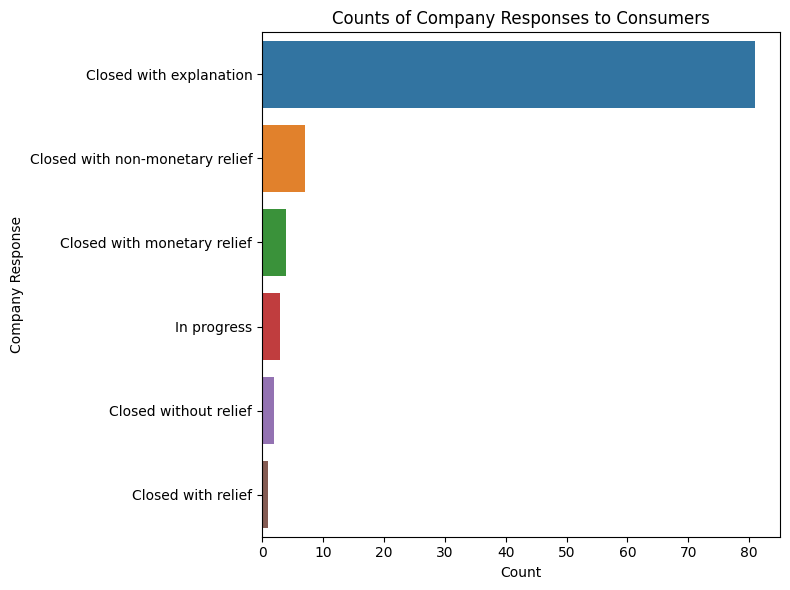

In [ ]:
response_counts = df['Company response to consumer'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Plot a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Response', data=response_counts, orient='h')
plt.title('Counts of Company Responses to Consumers')
plt.xlabel('Count')
plt.ylabel('Company Response')
plt.tight_layout()

plt.show()

In [ ]:
df['Consumer disputed?'].value_counts()

No               56
Not specified    23
Yes              19
Name: Consumer disputed?, dtype: int64

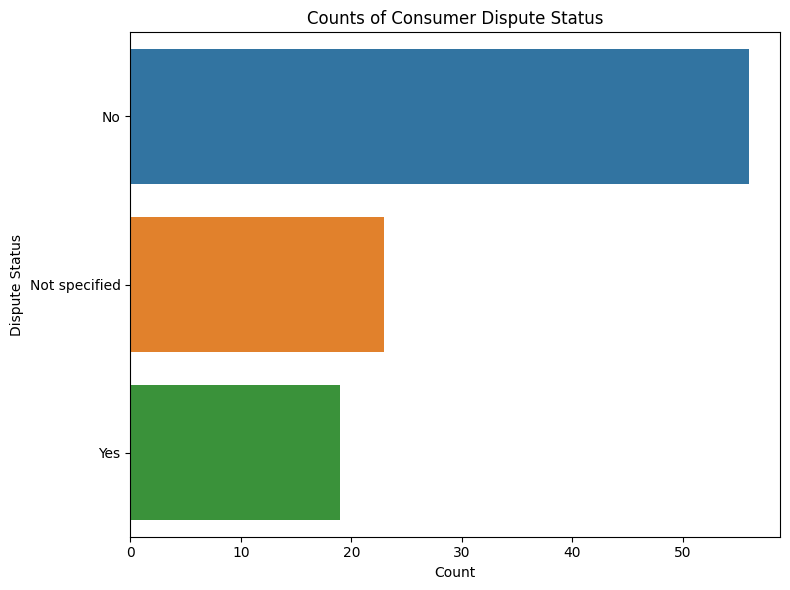

In [ ]:
# Count the occurrences of each consumer dispute status
dispute_counts = df['Consumer disputed?'].value_counts().reset_index()
dispute_counts.columns = ['Dispute Status', 'Count']

# Plot a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Dispute Status', data=dispute_counts, orient='h')
plt.title('Counts of Consumer Dispute Status')
plt.xlabel('Count')
plt.ylabel('Dispute Status')
plt.tight_layout()

plt.show()

In [ ]:
df['Product'].value_counts()

Mortgage                                                                        35
Debt collection                                                                 21
Credit reporting                                                                 9
Credit reporting, credit repair services, or other personal consumer reports     9
Bank account or service                                                          8
Student loan                                                                     6
Credit card                                                                      4
Credit card or prepaid card                                                      2
Money transfer, virtual currency, or money service                               2
Consumer Loan                                                                    1
Money transfers                                                                  1
Name: Product, dtype: int64

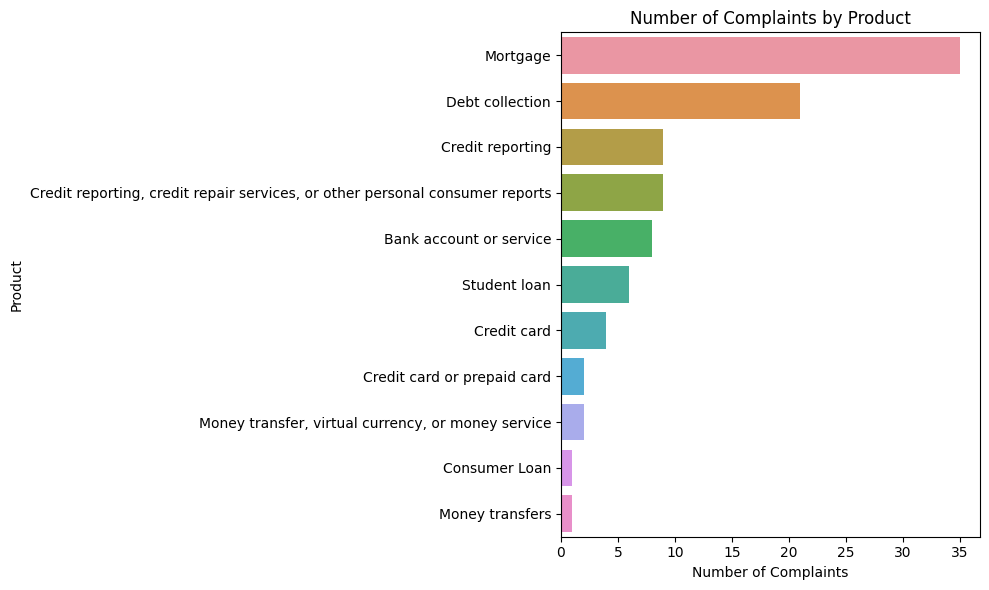

In [ ]:
product_counts = df['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']

# Plot a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Product', data=product_counts, orient='h')
plt.title('Number of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()

plt.show()

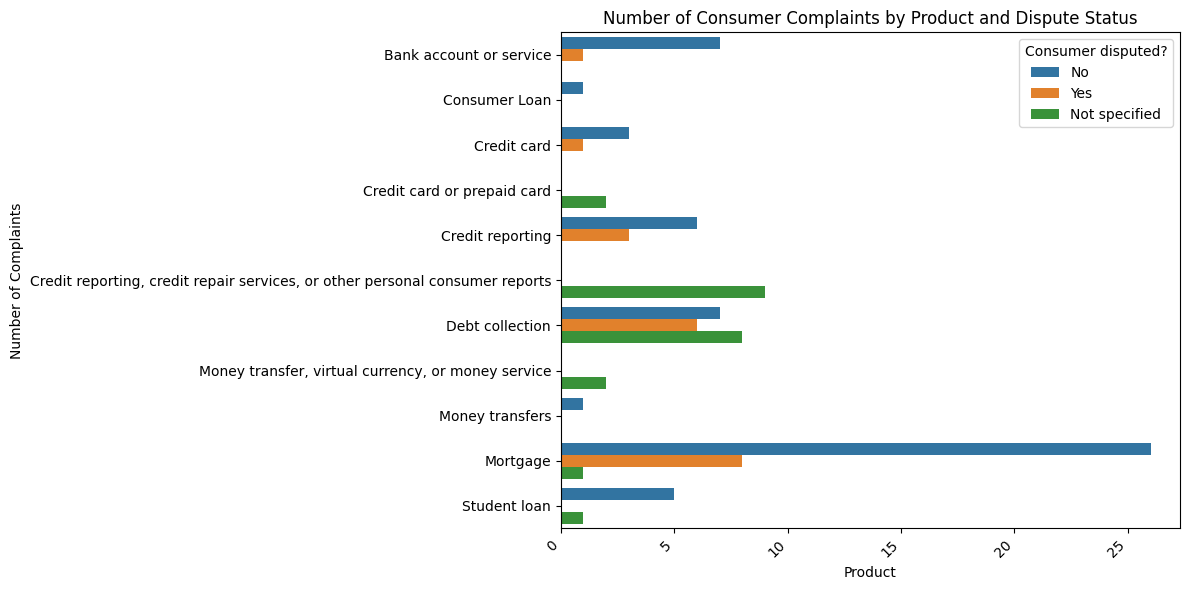

In [ ]:
# Count the occurrences of each product and consumer dispute status
product_dispute_counts = df.groupby(['Product', 'Consumer disputed?']).size().reset_index(name='Count')

# Plot a bar plot with hue differentiation using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(y='Product', x='Count', hue='Consumer disputed?', data=product_dispute_counts)
plt.title('Number of Consumer Complaints by Product and Dispute Status')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
df['Timely response?'].value_counts()

Yes    98
Name: Timely response?, dtype: int64

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

# Function to classify sentiment
def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity

        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

# Apply sentiment analysis to the complaint narratives
data['Sentiment'] = data['Consumer complaint narrative'].apply(get_sentiment)

# Print the sentiment distribution
print(data['Sentiment'].value_counts())

# Calculate sentiment distribution by dispute outcome
sentiment_dispute = data.groupby(['Sentiment', 'Consumer disputed?']).size().reset_index(name='Count')
print(sentiment_dispute)

Neutral     84
Positive     9
Negative     6
Name: Sentiment, dtype: int64
  Sentiment Consumer disputed?  Count
0  Negative                 No      1
1   Neutral                 No     51
2   Neutral                Yes     19
3  Positive                 No      4


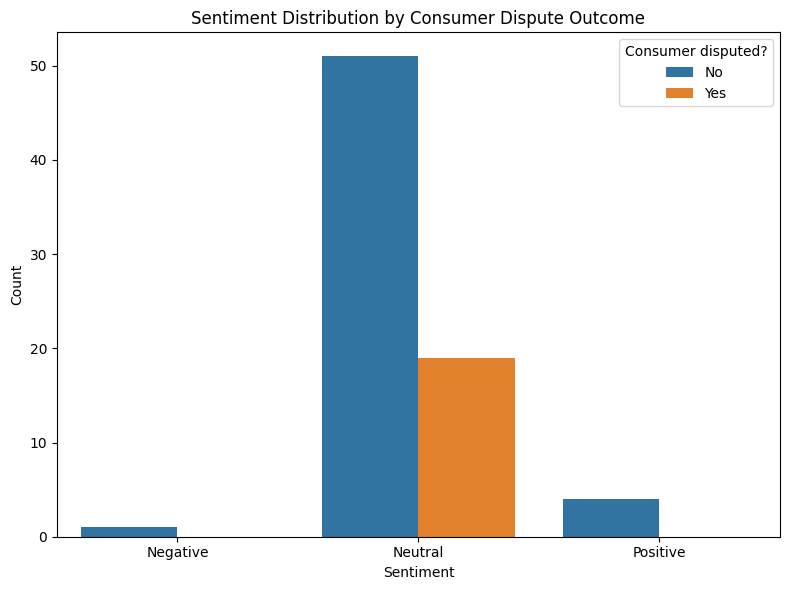

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_dispute, hue='Consumer disputed?')
plt.title('Sentiment Distribution by Consumer Dispute Outcome')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

<ipython-input-43-ef6c1c9a5b81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date received'] = pd.to_datetime(df['Date received'])


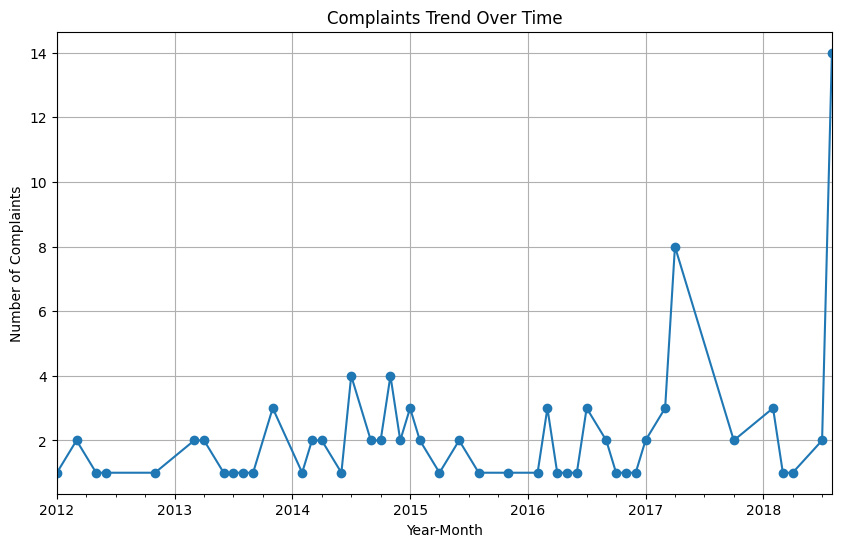

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date received' to datetime type
df['Date received'] = pd.to_datetime(df['Date received'])

# Group complaints by year and month
complaints_over_time = df.groupby(df['Date received'].dt.to_period('M')).size()

# Plot the trend
plt.figure(figsize=(10, 6))
complaints_over_time.plot(kind='line', marker='o')
plt.title('Complaints Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.grid()
plt.show()

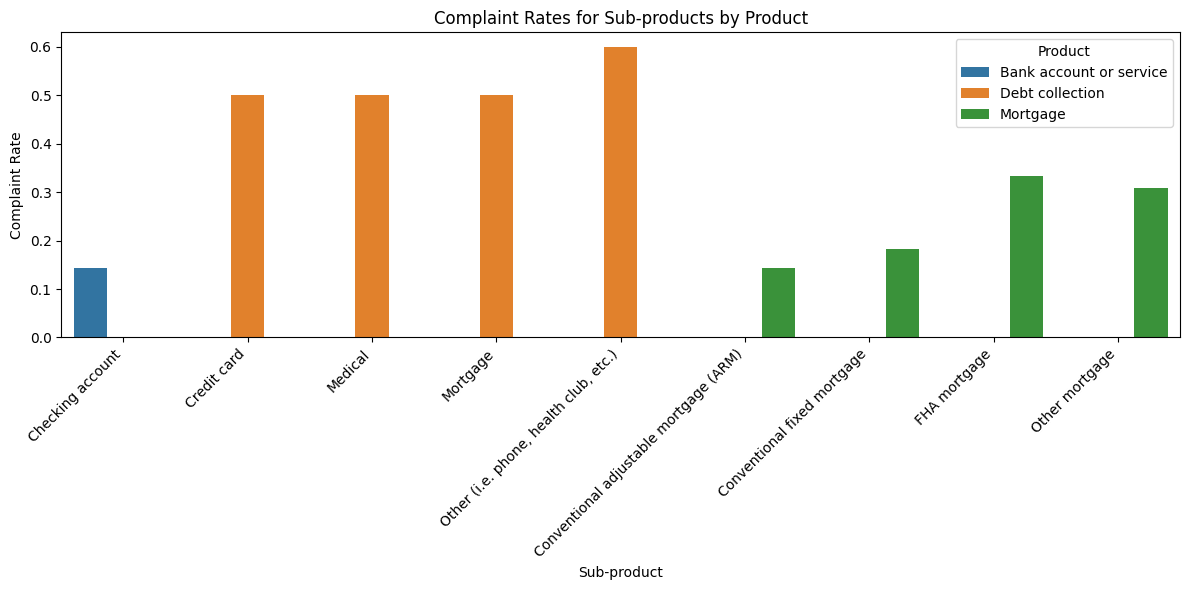

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate complaint rates by sub-product within each product
complaint_rates = data.groupby(['Product', 'Sub-product'])['Consumer disputed?'].value_counts(normalize=True).reset_index(name='Complaint Rate')

# Filter only for 'Yes' dispute outcomes
complaint_rates = complaint_rates[complaint_rates['Consumer disputed?'] == 'Yes']

# Plot the sub-product analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-product', y='Complaint Rate', data=complaint_rates, hue='Product')
plt.title('Complaint Rates for Sub-products by Product')
plt.xlabel('Sub-product')
plt.ylabel('Complaint Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# **Business** **Questions**
1.  analyzing which sub-products have the highest complaint rates or dispute outcomes
2.  Can we identify patterns in consumer complaints and group them into clusters to understand common issues or themes
3.	What factors might be contributing to high complaint numbers for certain products?
4.Can we predict whether a consumer  will be disputed or not based on the company's response to the consumer?
5.Can we predict whether a consumer dispute will be resolved or not based on the company's response to the consumer's complaint?




# **Answer no 3**




*a , b:*

BQ : 2:


*Can we identify patterns in consumer complaints and group them into clusters to understand common issues or themes*

#### K-means clustering on consumer complaint narratives.

# **3 Algorithm/Ml Model**

1.  K-means clustering:
2.  Latent Dirichlet Allocation (LDA):
3.  Gaussian Mixture Models:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


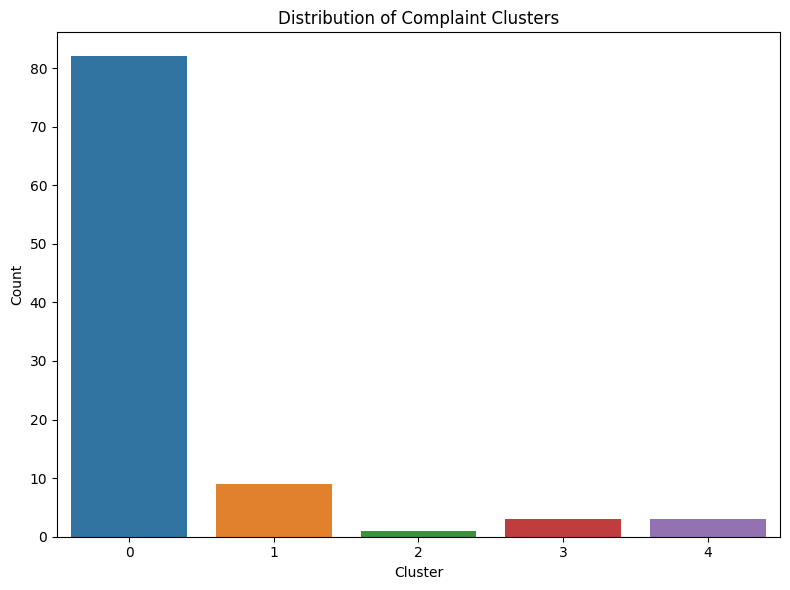

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with no consumer complaints
df = df[df['Consumer complaint narrative'].notnull()]

# Use TF-IDF vectorizer to convert text data to numerical vectors
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])

# Perform K-means clustering
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster')
plt.title('Distribution of Complaint Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


#### The count plot shows the distribution of complaints within each cluster, giving you an idea of how the complaints are grouped.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **Latent Dirichlet Allocation (LDA):**

(0, '0.032*"i" + 0.021*"to" + 0.021*"the" + 0.019*"and" + 0.019*"this" + 0.018*"a" + 0.017*"xxxx" + 0.015*"my" + 0.014*"they" + 0.013*"was"')
(1, '0.192*"no" + 0.191*"complaint" + 0.189*"filed" + 0.005*"one" + 0.005*"through" + 0.003*"few" + 0.003*"access" + 0.003*"monitoring" + 0.003*"capital" + 0.003*"spending"')
(2, '0.028*"xxxx" + 0.025*"i" + 0.021*":" + 0.021*"date" + 0.021*"inquiry" + 0.018*"have" + 0.015*"...." + 0.011*"the" + 0.011*"a" + 0.011*"credit"')
(3, '0.001*"no" + 0.001*"complaint" + 0.001*"filed" + 0.001*"the" + 0.001*"we" + 0.001*"to" + 0.001*"a" + 0.001*"and" + 0.001*"i" + 0.001*"this"')
(4, '0.042*"the" + 0.039*"to" + 0.034*"i" + 0.025*"and" + 0.023*"a" + 0.021*"xxxx" + 0.017*"my" + 0.015*"they" + 0.014*"have" + 0.013*"that"')


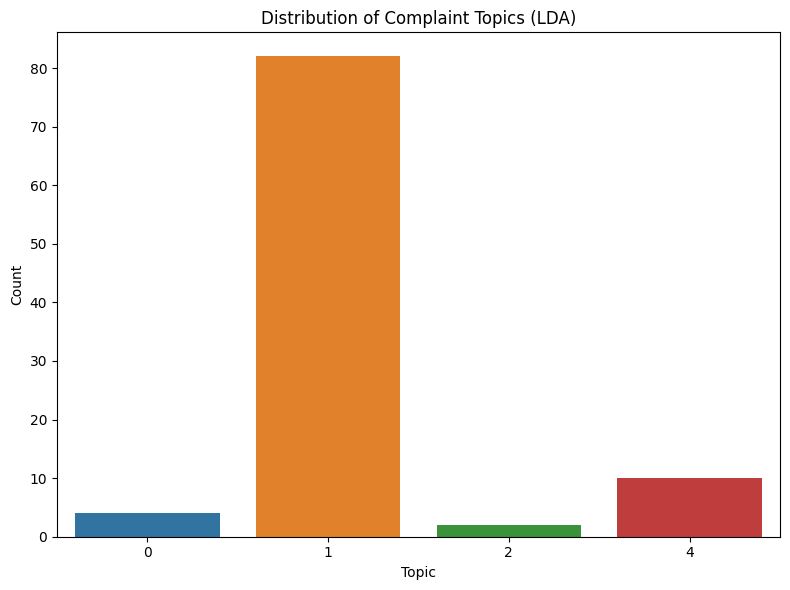

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with no consumer complaints
df = df[df['Consumer complaint narrative'].notnull()]

# Tokenize and preprocess text data
documents = df['Consumer complaint narrative'].tolist()
texts = [[word for word in document.lower().split()] for document in documents]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Perform LDA
num_topics = 5  # You can adjust the number of topics
lda = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print topics and top words in each topic
for topic in lda.print_topics():
    print(topic)

# Assign topics to complaints
df['Topic'] = [max(lda[doc], key=lambda item: item[1])[0] for doc in corpus]

# Plot the distribution of topics
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Topic')
plt.title('Distribution of Complaint Topics (LDA)')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


# **Gaussian Mixture Models:**

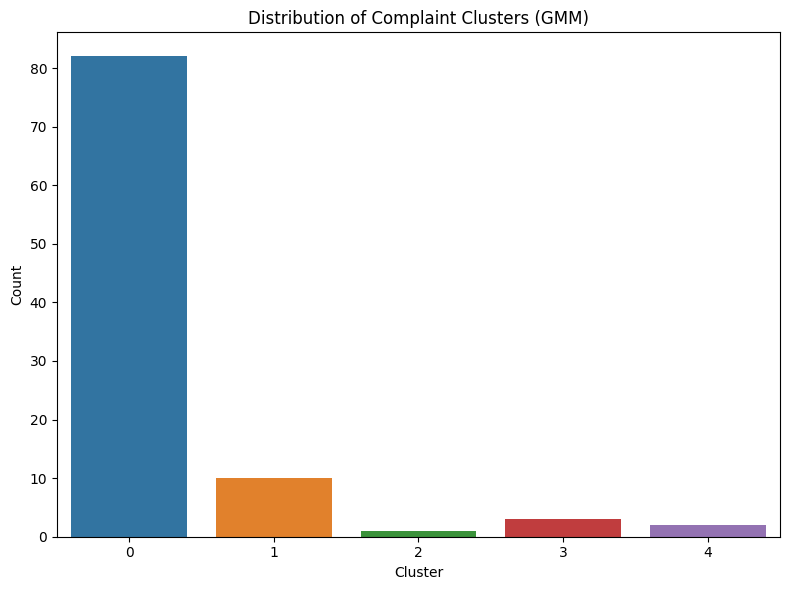

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns


# Filter out rows with no consumer complaints
df = df[df['Consumer complaint narrative'].notnull()]

# Use TF-IDF vectorizer to convert text data to numerical vectors
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])

# Perform Gaussian Mixture Models clustering
num_clusters = 5  # You can adjust the number of clusters
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
df['Cluster'] = gmm.fit_predict(X.toarray())

# Plot the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster')
plt.title('Distribution of Complaint Clusters (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


#### **Evaluation Metrics (Silhouette Score)**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import models
from sklearn.mixture import GaussianMixture

# Filter out rows with no consumer complaints
df = df[df['Consumer complaint narrative'].notnull()]

# Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])

# K-means clustering
num_clusters_kmeans = 5
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)

# Latent Dirichlet Allocation (LDA)
num_topics_lda = 5
lda = models.LdaModel(corpus, num_topics=num_topics_lda, id2word=dictionary, passes=15, random_state=42)
df['Topic_LDA'] = [max(lda[doc], key=lambda item: item[1])[0] for doc in corpus]

# Gaussian Mixture Models (GMM)
num_clusters_gmm = 5
gmm = GaussianMixture(n_components=num_clusters_gmm, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X.toarray())

# Calculate silhouette scores
silhouette_kmeans = silhouette_score(X, df['Cluster_KMeans'])
silhouette_lda = silhouette_score(X, df['Topic_LDA'])
silhouette_gmm = silhouette_score(X, df['Cluster_GMM'])

print(f"Silhouette Score (K-means): {silhouette_kmeans}")
print(f"Silhouette Score (LDA): {silhouette_lda}")
print(f"Silhouette Score (GMM): {silhouette_gmm}")


Silhouette Score (K-means): 0.8534975644515831
Silhouette Score (LDA): 0.8320830049770573
Silhouette Score (GMM): 0.8533849074568066


In This case, both K-means clustering and GMM seem to perform well in terms of silhouette score.

# ***BQ :1 : Answer*

### *analyzing which sub-products have the highest complaint rates or dispute outcomes,*

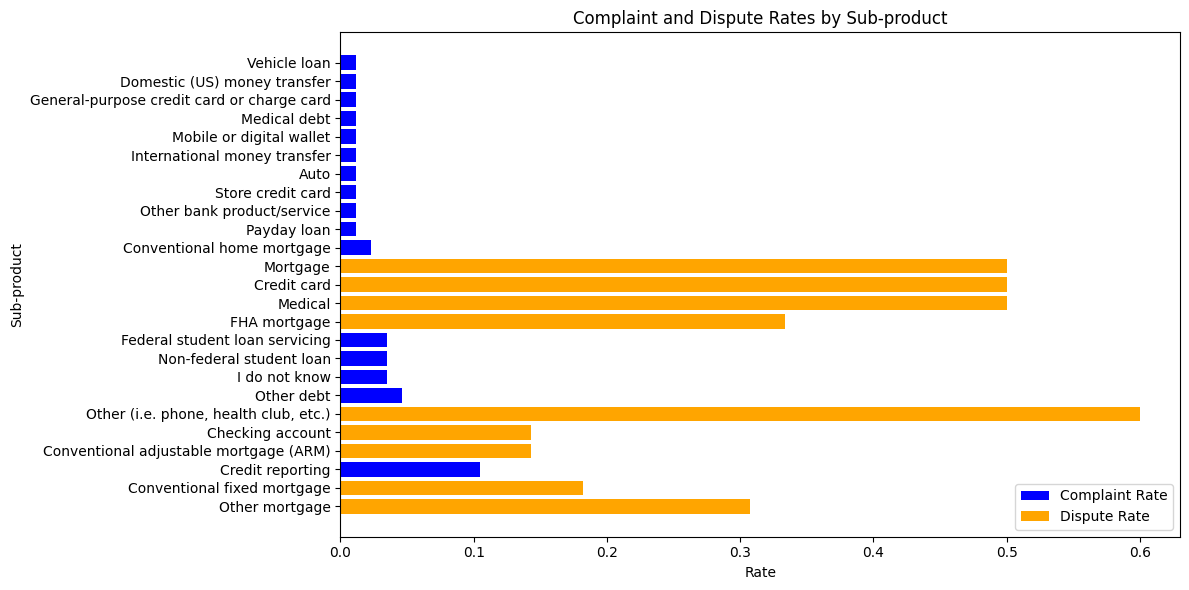

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

# Group by sub-product and calculate complaint and dispute rates
sub_product_complaints = data.groupby('Sub-product').size()
sub_product_disputes = data[data['Consumer disputed?'] == 'Yes'].groupby('Sub-product').size()

sub_product_complaint_rates = sub_product_complaints / sub_product_complaints.sum()
sub_product_dispute_rates = sub_product_disputes / sub_product_complaints

# Create a DataFrame to hold the rates
sub_product_rates = pd.DataFrame({
    'Complaint Rate': sub_product_complaint_rates,
    'Dispute Rate': sub_product_dispute_rates
}).reset_index()

# Sort by complaint rate to visualize
sub_product_rates = sub_product_rates.sort_values(by='Complaint Rate', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.barh(sub_product_rates['Sub-product'], sub_product_rates['Complaint Rate'], color='blue', label='Complaint Rate')
plt.barh(sub_product_rates['Sub-product'], sub_product_rates['Dispute Rate'], color='orange', label='Dispute Rate')
plt.xlabel('Rate')
plt.ylabel('Sub-product')
plt.title('Complaint and Dispute Rates by Sub-product')
plt.legend()
plt.tight_layout()
plt.show()


# **Ml Models**
1.   Logistic Regression
2.   Random Forest
3.   Gradient Boosting




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocessing
X = df.drop('Consumer disputed?', axis=1)
y = df['Consumer disputed?']

# Convert 'No' to 0 and 'Yes' to 1 in the target variable
y = y.apply(lambda x: 0 if x == 'No' else 1)

# One-hot encode categorical features
categorical_features = ['Product', 'Sub-product', 'State', 'Submitted via', 'Company response to consumer']
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[categorical_features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg))

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

# Train and evaluate XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))


Logistic Regression Results:
Accuracy: 0.8
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666

Random Forest Results:
Accuracy: 0.6
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333

XGBoost Results:
Accuracy: 0.6
Precision: 0.375
Recall: 0.5
F1-Score: 0.42857142857142855


#### **Logistic Regression:** The model has an accuracy of 0.8, which means it correctly predicts consumer disputes about 80% of the time. The precision, recall, and F1-score are all approximately 0.67, indicating balanced performance between predicting positive (disputed) and negative (not disputed) cases.

####**Random Forest and XGBoost:** Both the Random Forest and XGBoost models have lower accuracy, precision, recall, and F1-score compared to Logistic Regression. This might suggest that these models are struggling to effectively distinguish between the classes in this particular case.

# BQ :3 :

*	What factors might be contributing to high complaint numbers for certain products?

 Analyzing customer feedback and comments can reveal common issues and guide improvement efforts.*

In [ ]:
df['State'].value_counts()

In [45]:
df.columns


Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [126]:
import pandas as pd
from textblob import TextBlob
from collections import Counter

# Filter complaints for a specific product (e.g., 'Mortgage')
selected_product = 'Mortgage'
product_complaints = df[df['Product'] == selected_product]

# Extract and preprocess complaint narratives
complaints_text = product_complaints['Consumer complaint narrative'].dropna()

# Combine all complaint narratives into a single string
combined_text = ' '.join(complaints_text)

# Tokenize the text
tokens = combined_text.split()

# Remove common stopwords, special characters, and convert to lowercase
stop_words = set(['the', 'and', 'in', 'of', 'to', 'for', 'with', 'a', 'on', 'was', 'i'])
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Create a Counter to count the frequency of words
word_counts = Counter(filtered_tokens)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(10)

print("Most common words and their frequencies:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common words and their frequencies:
no: 35
complaint: 33
filed: 33
we: 23
this: 20
they: 16
my: 13
that: 10
it: 10
closing: 9


In [127]:
import pandas as pd
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Filter complaints for a specific product (e.g., 'Mortgage')
selected_product = 'Mortgage'
product_complaints = df[df['Product'] == selected_product]

# Extract and preprocess complaint narratives
complaints_text = product_complaints['Consumer complaint narrative'].dropna()

# Tokenize and preprocess text
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

tokenized_texts = [word_tokenize(text.lower()) for text in complaints_text]
filtered_texts = [[word for word in tokens if word.isalpha() and word not in stop_words] for tokens in tokenized_texts]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(filtered_texts)
corpus = [dictionary.doc2bow(text) for text in filtered_texts]

# Train LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and associated keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(0, '0.129*"filed" + 0.129*"complaint" + 0.024*"mortgage" + 0.020*"payment" + 0.016*"bb"')
(1, '0.004*"complaint" + 0.004*"filed" + 0.004*"closing" + 0.004*"account" + 0.004*"fixed"')
(2, '0.030*"closing" + 0.020*"account" + 0.020*"xxxx" + 0.018*"rate" + 0.018*"fixed"')
(3, '0.004*"closing" + 0.004*"would" + 0.004*"xxxx" + 0.004*"account" + 0.004*"fixed"')
(4, '0.004*"filed" + 0.004*"complaint" + 0.004*"closing" + 0.004*"account" + 0.004*"bank"')


# Bq : 04:

* "Can we predict whether a consumer  will be disputed or not based on the company's response to the consumer?"*

In [133]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Sentiment Score'],
      dtype='object')

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target
X = df[['Company response to consumer']]  # Use 'Company response to consumer' as a feature
y = df['Consumer disputed?']

# One-hot encode 'Company response to consumer'
encoder = OneHotEncoder(sparse=False)
encoded_responses = encoder.fit_transform(X)
encoded_df = pd.DataFrame(encoded_responses, columns=encoder.get_feature_names_out(['Company response to consumer']))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict consumer dispute outcomes on the testing set
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.75
Classification Report:
                precision    recall  f1-score   support

           No       0.74      1.00      0.85        14
Not specified       1.00      0.25      0.40         4
          Yes       0.00      0.00      0.00         2

     accuracy                           0.75        20
    macro avg       0.58      0.42      0.42        20
 weighted avg       0.72      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: P

In [145]:
#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict consumer dispute outcomes on the testing set
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.75
Classification Report:
                precision    recall  f1-score   support

           No       0.74      1.00      0.85        14
Not specified       1.00      0.25      0.40         4
          Yes       0.00      0.00      0.00         2

     accuracy                           0.75        20
    macro avg       0.58      0.42      0.42        20
 weighted avg       0.72      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
# Train a Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict consumer dispute outcomes on the testing set
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.75
Classification Report:
                precision    recall  f1-score   support

           No       0.74      1.00      0.85        14
Not specified       1.00      0.25      0.40         4
          Yes       0.00      0.00      0.00         2

     accuracy                           0.75        20
    macro avg       0.58      0.42      0.42        20
 weighted avg       0.72      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BQ : 5:

*Can we predict whether a consumer dispute will be resolved or not based on the company's response to the consumer's complaint?*

In [152]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Sentiment Score',
       'VADER_sentiment', 'TextBlob_sentiment', 'Simple_sentiment'],
      dtype='object')

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features and target variable
X = df[['Company response to consumer']]
y = df['Consumer disputed?']

# Encode categorical features using LabelEncoder
le = LabelEncoder()
X['Company response to consumer'] = le.fit_transform(X['Company response to consumer'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("=" * 50)


<ipython-input-157-3ed70f91d2eb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Company response to consumer'] = le.fit_transform(X['Company response to consumer'])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

Model: Logistic Regression
Accuracy: 0.65
Classification Report:
                precision    recall  f1-score   support

           No       0.68      0.93      0.79        14
Not specified       0.00      0.00      0.00         4
          Yes       0.00      0.00      0.00         2

     accuracy                           0.65        20
    macro avg       0.23      0.31      0.26        20
 weighted avg       0.48      0.65      0.55        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
Accuracy: 0.75
Classification Report:
                precision    recall  f1-score   support

           No       0.74      1.00      0.85        14
Not specified       1.00      0.25      0.40         4
          Yes       0.00      0.00      0.00         2

     accuracy                           0.75        20
    macro avg       0.58      0.42      0.42        20
 weighted avg       0.72      0.75      0.67        20

Model: Gradient Boosting
Accuracy: 0.75
Classification Report:
                precision    recall  f1-score   support

           No       0.74      1.00      0.85        14
Not specified       1.00      0.25      0.40         4
          Yes       0.00      0.00      0.00         2

     accuracy                           0.75        20
    macro avg       0.58      0.42      0.42        20
 weighted avg       0.72      0.75      0.67        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Answe No 3**

*C : Sentiment Analysis that lead to Consumer disputed......*

In [ ]:
#Now with Vander library which is specially for short texts

In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis using VADER
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    return compound_score

# Apply sentiment analysis to the 'Consumer complaint narrative' column
df['Sentiment Score'] = df['Consumer complaint narrative'].apply(analyze_sentiment)

# Print the DataFrame with sentiment scores
print(df)


In [ ]:
df.columns

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df['Consumer complaint narrative']
y = df['Consumer disputed?']

# Perform sentiment analysis using TextBlob
sentiment_scores = X.apply(lambda text: TextBlob(text).sentiment.polarity)

# Create a DataFrame with sentiment scores
sentiment_df = pd.DataFrame({'Sentiment': sentiment_scores})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentiment_df, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict consumer disputes on the testing set
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8


In [117]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, predictions, labels=model.classes_)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14  0  0]
 [ 2  2  0]
 [ 2  0  0]]


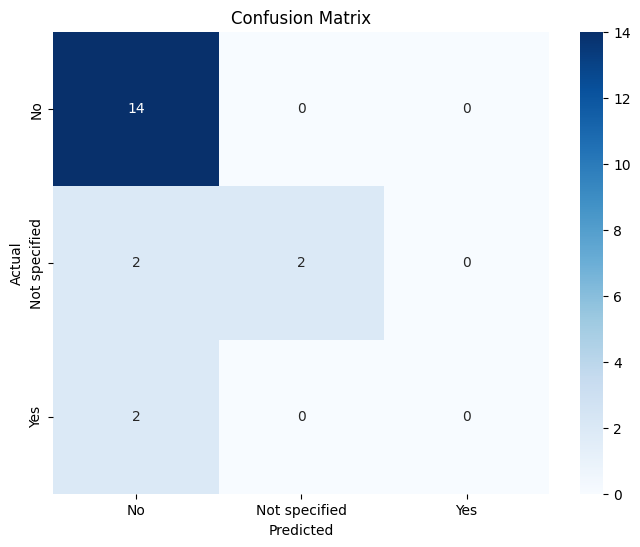

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#end


Business Questions
1.  analyzing which sub-products have the highest complaint rates or dispute outcomes
2.  Can we identify patterns in consumer complaints and group them into clusters to understand common issues or themes
3.	What factors might be contributing to high complaint numbers for certain products?
4.Can we predict whether a consumer  will be disputed or not based on the company's response to the consumer?
5.Can we predict whether a consumer dispute will be resolved or not based on the company's response to the consumer's complaint?


